# Taller Física avanzada: Física moderna.
Justificación de los puntos. Ver preguntas y respuestas completas en el pdf.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, simps

In [2]:
h = 6.62607015E-34 # en j/s
c =  299792458 # en m/s
kb = 1.380649E-23 # en eV/K
stf = 5.670373E-8 #en W/m^2K^4
Rh = 13.605686788860648 # en eV, extraido del punto 10

def planck_int(temp,wave):
  a = 2*h*np.pi*c**2
  b = h*c/(wave*kb*T)
  inten = a / ((wave**5) * (np.exp(b) - 1))
  return inten

def planck_den(temp,wave):
  a = 8*h*np.pi*c
  b = h*c/(wave*kb*T)
  den = a / ((wave**5) * (np.exp(b) - 1))
  return den

def ray_jean_den(temp,wave):
  a = 8*np.pi*kb*temp
  den = a / wave**4
  return den

def niv_energ(n):
  return (-Rh/n**2)

## Punto 3

<ipython-input-2-e385ee8f649d>:10: RuntimeWarning: overflow encountered in exp
  inten = a / ((wave**5) * (np.exp(b) - 1))


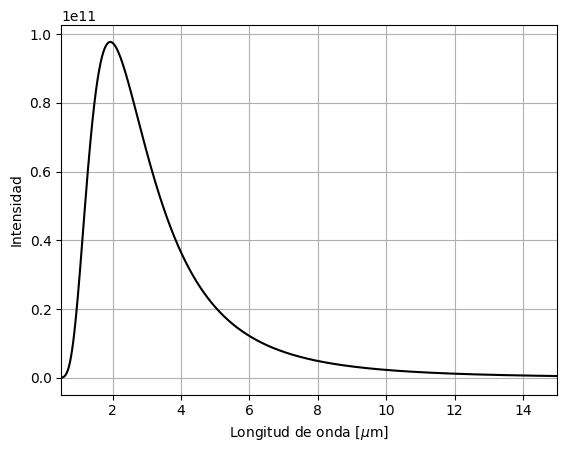

La potencia total según ley de planck = 287062.7044901841
Para la ley de steffan-boltzman = 287062.633125 

Hay una diferencia de 2.4860486219960635e-05%


In [3]:
T = 1500
wavelength = np.arange(1E-9,3E-3,1E-9)
pl = planck_int(T,wavelength)

plt.plot(wavelength*1E6,pl,color="black")
plt.xlabel("Longitud de onda [$\mu$m]")
plt.ylabel("Intensidad")
plt.xlim(0.5,15)
plt.grid()
plt.show()

potencia_total_pl = np.sum(pl[:-1] * np.diff(wavelength))
potencia_total_stf_bl = stf * T**4

print(f"La potencia total según ley de planck = {potencia_total_pl}")
print(f"Para la ley de steffan-boltzman = {potencia_total_stf_bl} \n")
print(f"Hay una diferencia de {(potencia_total_pl - potencia_total_stf_bl)*100/potencia_total_pl}%")

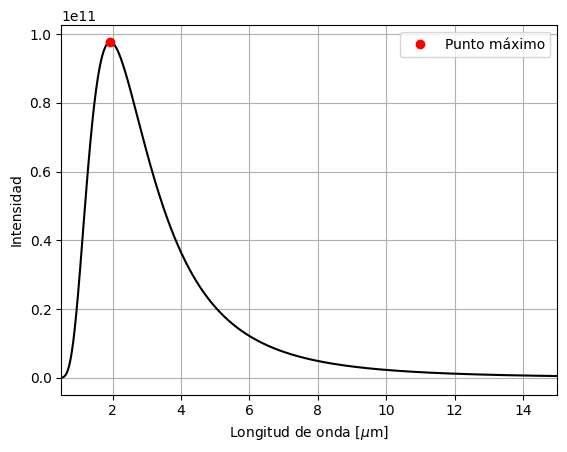

Intensidad máxima de 97708335351.41426 en 1.9320000000000003e-06
Según la ley de desplazamiento de Wien, la intensidad máxima es de 97708336811.2888 en 1.93184797e-06
Hay una diferencia de 0.007869047619062172%


In [4]:
max = np.argmax(pl)
plt.plot(wavelength*1E6,pl,color="black")
plt.plot(wavelength[max]*1E6, pl[max], "ro", label=f"Punto máximo")
plt.xlabel("Longitud de onda [$\mu$m]")
plt.ylabel("Intensidad")
plt.xlim(0.5,15)
plt.grid()
plt.legend()
plt.show()

print(f"Intensidad máxima de {pl[max]} en {wavelength[max]}")
wien_b = 2.897771955E-3 # En m*k
wien_wave = wien_b/T
wien_max = planck_int(1500, wien_wave)
print(f"Según la ley de desplazamiento de Wien, la intensidad máxima es de {wien_max} en {wien_wave}")
print(f"Hay una diferencia de {(wavelength[max]-wien_wave)*100/wavelength[max]}%")

## Punto 4

<ipython-input-2-e385ee8f649d>:10: RuntimeWarning: overflow encountered in exp
  inten = a / ((wave**5) * (np.exp(b) - 1))
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


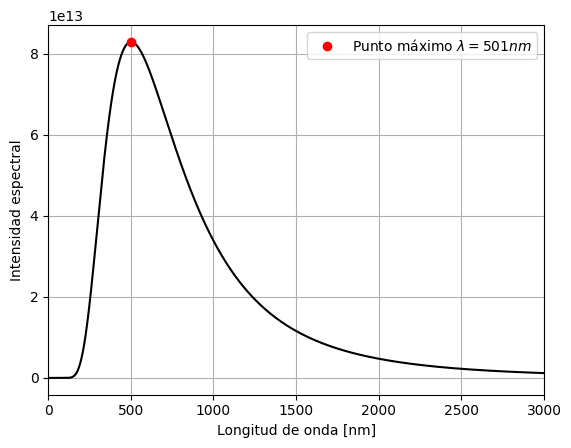

63200699.73499086
3.847248419440937e+26


In [5]:
T = 5778
wavelength = np.arange(1E-9,3E-3,1E-9)
pl = planck_int(T,wavelength)
R = 6.96E8
area = 4 * np.pi * (R**2)

max = np.argmax(pl)

plt.plot(wavelength*1E9,pl,color="black")
plt.plot(wavelength[max]*1E9, pl[max], "ro", label="Punto máximo $\lambda= 501nm$")
plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Intensidad espectral")
plt.xlim(0,3000)
plt.grid()
plt.legend()
plt.show()

pot_area = np.sum(pl[:-1] * np.diff(wavelength))
p_total = pot_area * area
print(pot_area)
print(p_total)

## Punto 5

<ipython-input-2-e385ee8f649d>:16: RuntimeWarning: overflow encountered in exp
  den = a / ((wave**5) * (np.exp(b) - 1))


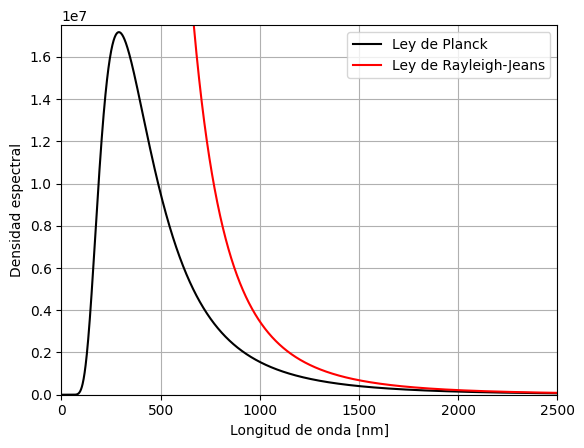

Ambos modelos coninciden con un error menor de 4.999958233904825 a partir de una longitud de 14.144000000000002micrometros


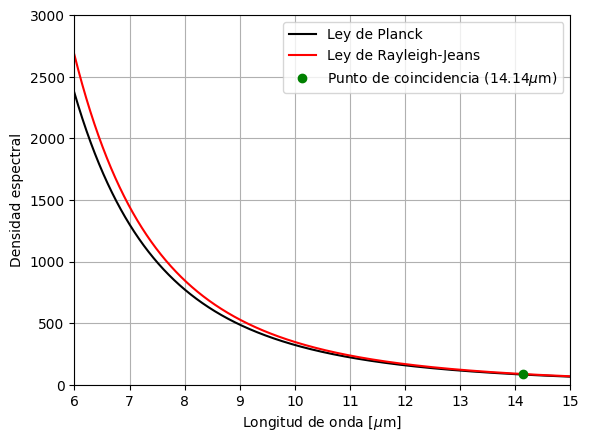

In [6]:
T = 10000
wavelength = np.arange(1E-9,4E-3,1E-9)
pl = planck_den(T, wavelength)
rayjn = ray_jean_den(T, wavelength)

plt.plot(wavelength*1E9, pl, color="black", label="Ley de Planck")
plt.plot(wavelength*1E9, rayjn, color="red", label="Ley de Rayleigh-Jeans")
plt.xlabel("Longitud de onda [nm]")
plt.ylabel("Densidad espectral")
plt.xlim(0,2.5E3)
plt.ylim(0,1.75E7)
plt.grid()
plt.legend()
plt.show()

error = 100
i = 0
while True :
  error = (rayjn[i]-pl[i])*100/rayjn[i]
  if error > 5:
    i += 1
    pass
  elif error <= 5:
    break

print(f"Ambos modelos coninciden con un error menor de {error} a partir de una longitud de {wavelength[i]*1E6}micrometros")
plt.plot(wavelength*1E6, pl, color="black", label="Ley de Planck")
plt.plot(wavelength*1E6, rayjn, color="red", label="Ley de Rayleigh-Jeans")
plt.plot(wavelength[i]*1E6, rayjn[i], "go", label=f"Punto de coincidencia ({round(wavelength[i]*1E6,2)}$\mu$m)")
plt.xlabel("Longitud de onda [$\mu$m]")
plt.ylabel("Densidad espectral")
plt.xlim(6,15)
plt.ylim(0,3E3)
plt.grid()
plt.legend()
plt.show()

## Punto 10

In [7]:
me = 9.10938291E-31
e = 1.602176487E-19
e0 = 8.854187817E-12
h_bar_j = 1.054571817E-34 #en J*s

Rh_j = (me*(e**4))/(2*(4*np.pi*e0)**2*(h_bar_j**2))
Rh_ev = Rh_j*6.241509E18
print(f"El valor de la constante de Rydberg para el hidrógeno es de {Rh_j}J o {Rh_ev}eV")

El valor de la constante de Rydberg para el hidrógeno es de 2.1798713722692137e-18J o 13.605686788860648eV


## Punto 11 y 12

In [8]:
niv = np.arange(1,8,1)
energ = niv_energ(niv)
h = 4.135667696E-15 # en eVs
print(f"Los niveles de energía para cada nivel del Hidrógeno es: ")
for i in niv:
  print(f"Nivel {i}: {energ[i-1]} eV")

print(f"\nPara pasar del nivel 2 al 3, se liberan {energ[1] - energ[2]}eV con una longitud de onda de {abs((h*c)/(energ[1] - energ[2]))}")

Los niveles de energía para cada nivel del Hidrógeno es: 
Nivel 1: -13.605686788860648 eV
Nivel 2: -3.401421697215162 eV
Nivel 3: -1.511742976540072 eV
Nivel 4: -0.8503554243037905 eV
Nivel 5: -0.544227471554426 eV
Nivel 6: -0.377935744135018 eV
Nivel 7: -0.2776670773236867 eV

Para pasar del nivel 2 al 3, se liberan -1.88967872067509eV con una longitud de onda de 6.561125817261158e-07
